In [2]:
import numpy as np
from numpy import linalg
import scipy as scp
from scipy import linalg

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

pl = np.load('data2/pl_mass1.npy')
for i in range(1,6):
#     pl.append(np.transpose(np.load('pl_mass%s.npy'%(i+1)),(1,2,0,5,3,4))[0][4])
    pl = np.concatenate((pl,(np.load('data2/pl_mass%s.npy'%(i+1)))),axis = 1)
pl = np.transpose(pl,(2,1,0,5,3,4))[4]
print(np.shape(pl))

deriv = []
# deriv = np.load('deriv_mass1.npy')
for i in range(6):
    deriv.append(np.load('data2/deriv_mass%s.npy'%(i+1)))
deriv = np.transpose(deriv,(0,1,4,2,3))
print(np.shape(deriv))

#imports P(ell) and removes the mass dimension with [0] and selects the central value param run with [4] 
# deriv = np.transpose(np.load('deriv_mass1.npy'),(0,3,1,2))
#imports derivatives
# print 'P(ell) shape  : ',np.shape(pl),' should be (5, 2998, 6, 6)'
# print 'Derivative shape  : ',np.shape(deriv),' should be (5, 2998, 6, 6)'
# print '(5 parameters, 2998 ell-values, 6x6 correlated zbins)'

ell = np.arange(2,3000,1)
ell_mod = np.reshape((2.*ell+1.)/2.,(1,1,1,2998))
fsky = 0.485

(6, 5, 2998, 6, 6)
(6, 5, 2998, 6, 6)


(6, 5, 6, 6, 2998)


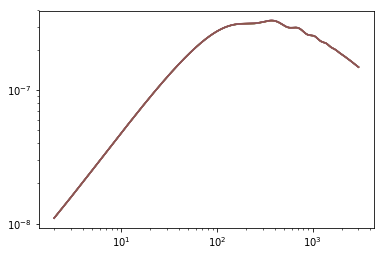

In [4]:
ell_mod = np.reshape((2.*ell+1.)/2.,(1,1,1,1,2998))
pl_plot = ell_mod*np.transpose(pl,(0,1,3,4,2))
print(np.shape(pl_plot))
for i in range(6):
    plt.loglog(ell,np.sqrt(pl_plot[i][0][0][0]))
# plt.yscale('log')

In [12]:
# inv = np.linalg.inv(pl)
test = pl[0][0][1000]
print(np.linalg.cond(test))
inv = np.linalg.inv(test)
print(np.matmul(inv,test))

# print(np.shape(inv),np.shape(deriv))
# inv2 = np.transpose(inv,(0,2,3,4,1))[0][1000][0][0]
# deriv2 = np.transpose(deriv,(0,2,3,4,1))[0][1000][0][0]
# intrace2 = []
# for i in range(5):
#     h1 = []
#     h2 = []
#     h3 = []
#     for j in range(5):
#         h1.append(0.5*(inv2[i]*deriv2[i]*inv2[i]*deriv2[j]))
#         h2.append(0.5*(inv2[j]*deriv2[j]*inv2[j]*deriv2[i]))
#         h3 = h2+h1
#     intrace2.append(h3)
# print(intrace2)
        

76.36344355667015
[[ 1.00000000e+00 -3.60822483e-16 -9.02056208e-17  1.38777878e-17
  -5.99346961e-16 -9.44936403e-16]
 [ 2.24820162e-15  1.00000000e+00  3.53449908e-16  6.92534138e-17
   7.07509680e-17  6.56824287e-16]
 [-7.77156117e-16 -3.33066907e-16  1.00000000e+00 -6.37510877e-16
  -2.85145171e-16  1.99378003e-16]
 [-1.38777878e-16 -1.35308431e-16 -5.37764278e-17  1.00000000e+00
   6.49708152e-17 -4.19717531e-16]
 [-5.55111512e-16 -2.77555756e-16  1.04083409e-16 -2.53269627e-16
   1.00000000e+00  6.65158033e-17]
 [ 1.11022302e-16  8.32667268e-17  1.90819582e-17 -8.28330460e-17
   1.30917412e-16  1.00000000e+00]]


In [7]:
print('inverting P(ell)...')
inv = np.linalg.inv(pl)
print(np.shape(inv))

# print 'multiplying P(ell) and derivative matrices...'
# in_trace = []
# for x in range(6):
#     h1 = []
#     for i in range(5):
#         h2 = []
#         h3 = []
#         h4 = []
#         for j in range(5):
#             h2.append(0.5*(np.matmul(np.matmul(np.matmul(inv[x][i],deriv[x][i]),inv[x][i]),deriv[x][j])))
#             h3.append(0.5*(np.matmul(np.matmul(np.matmul(inv[x][j],deriv[x][j]),inv[x][j]),deriv[x][i])))
#             h4 = (h2+h3)
#         h1.append(h4)
#     in_trace.append(h1)

# test2 = np.transpose(in_trace,(0,3,4,5,1,2))[0][1000][0][0]
# print test2

# print 'computing fisher matrix...'
# trace = np.trace(in_trace,axis1 = 4,axis2 = 5)
# print np.shape(trace)
# test = np.transpose(trace,(3,0,1,2))
# print test[1000][0]
# fisher = fsky*np.sum(trace*ell_mod,axis = 3)
# print fisher[0]
# print 'extracting forecasted constraints...'
# # covariance = scp.linalg.pinv2(fisher)
# covariance = np.linalg.inv(fisher)
# print covariance[0]
# print np.linalg.cond(fisher[3])

# # print np.matmul(covariance,fisher)
# constraints = []
# for i in range(6):
#     constraints.append(np.sqrt(np.diag(covariance[i])))

# param_names = ['\Omega_b','\Omega_{cdm}','f_a','n_s','H_0']
# fv = [0.02225,0.1198,0.0001,67.27,0.9645]
# for i in range(len(constraints)):
#     for j in range(6):
#         print r'$%s$'%(param_names[i]),' :  ',fv[i],' $\pm$ ',np.round(constraints[j][i],5)

# cholesky = np.linalg.cholesky(fisher)
# cov = np.dot(np.linalg.inv(np.transpose(cholesky)),np.linalg.inv(cholesky))
# print cov

# print np.linalg.cond(fisher)
# condition number is 5e9, which is below 10e16 to be officially 'ill-conditioned'
# linalg.pinv2 does a pretty good job but not amazing
# cannot do cholesky b/c not positive definite

inverting P(ell)...
(6, 5, 2998, 6, 6)


In [4]:
# %matplotlib inline
# import matplotlib
# import matplotlib.pyplot as plt

# ell_mod2 = np.reshape(ell_mod,(1,1,1,2998))
# pl_plot = np.transpose(pl,(0,1,3,2))*ell_mod2
# deriv_plot = np.transpose(deriv,(0,1,3,2))
# print np.shape(pl_plot),np.shape(deriv_plot)
    
# for i in range(6):
#     plt.loglog(ell,pl_plot[i][2][0])

In [5]:
# for i in range(6):
# #     plt.loglog(ell,np.abs(deriv_plot[i][2][0]))
#     plt.plot(ell,deriv_plot[i][2][0])
# plt.xscale('log')

In [7]:
# #cross-correlation

# pl_correlated = []
# deriv_correlated = []
# for i in range(np.shape(pl)[0]):
#     pl_hold1 = []
#     deriv_hold1 = []
#     for j in range(np.shape(pl)[1]):
#         pl_hold2 = []
#         deriv_hold2 = []
#         for m in range(np.shape(pl)[2]):
#             pl_hold3 = []
#             deriv_hold3 = []
#             for x in range(np.shape(pl)[3]):
#                 pl_hold4 = []
#                 deriv_hold4 = []
#                 for y in range(np.shape(pl)[3]):
#                     pl_hold4.append(pl[i][j][m][x]*pl[i][j][m][y])
#                     deriv_hold4.append(deriv[i][j][m][x]*deriv[i][j][m][y])
#                 pl_hold3.append(pl_hold4)
#                 deriv_hold3.append(deriv_hold4)
#             pl_hold2.append(pl_hold3)
#             deriv_hold2.append(deriv_hold3)
#         pl_hold1.append(pl_hold2)
#         deriv_hold1.append(deriv_hold2)
#     pl_correlated.append(pl_hold1)
#     deriv_correlated.append(deriv_hold1)
#     print 'completed',i+1,'/11'

# print 'P(ell) correlated shape :  ',np.shape(pl_correlated),'  // should be (11, 5, 2998, 30, 30)'
# print 'P(ell) correlated derivative shape :  ',np.shape(deriv_correlated),'  // should be (11, 5, 2998, 30, 30)'

In [8]:
# np.save('pl_correlated.npy',pl_correlated)
# np.save('deriv_correlated.npy',deriv_correlated)

# pl_correlated = np.load('pl_correlated.npy')
# deriv_correlated = np.load('deriv_correlated.npy')

In [61]:
# test = pl_correlated[2][0]
# print np.shape(test)

# p1 = np.transpose(test,(1,0,2))
# p2 = np.transpose(test,(2,0,1))

# for i in range(100,102):
#     for x in range(30):
#         for y in range(30):
#             plt.plot(test[i][x],test[i][y])

(2998, 30, 30)


In [11]:
# pl_inverse = np.linalg.cholesky(pl_correlated)
# print 'P(ell) inverse shape :  ',np.shape(pl_inverse),'  // should be (11, 5, 2998, 30, 30)'

test = pl_correlated[2][0][1000]
# test2 = test*np.power(10,17)
# inverse = np.linalg.inv(test2)
# print np.shape(inverse)
# check = np.matmul(inverse,test2)
# print check

twos = []
for i in range(2):
    hold = []
    for j in range(26,28):
        hold.append(test2[i][j])
    twos.append(hold)
print twos
# print 'condition number = ',np.linalg.cond(twos)
# inverse2 = scp.linalg.pinv2(twos)
# print inverse2
# check = np.matmul(twos,inverse2)
# print check

# diagonal = np.zeros((30,30))
# for i in range(30):
#     for j in range(30):
#         if i == j:
#             diagonal[i][j] = np.diag(test)[i]
# inv = np.linalg.inv(diagonal)
# print np.diag(inv)
# cholesky = np.linalg.cholesky(diagonal)
# # print np.linalg.cond(cholesky)
# inv2 = np.dot(np.linalg.inv(np.transpose(cholesky)),np.linalg.inv(cholesky))
# print np.diag(inv2)

####### ERRORS ########
#not inverting properly with .inv nor .pinv -- not returning mat*mat_inv = I
#cholesky error 'matrix is not positive definite'

####### TESTS #######
# matrix is ill conditioned (condition number= 5.5e20) but not singular
# cholesky does NOT work even for a reduced 2x2 version of the 30x30 matrix
# np.linalg.inv works (i.e. P*P_inv = I) after zeroing all off-diagonals --> off_diagonals are the problem
# --- subnote :  np.linalg.cholesky also works with zeroed off-diagonals
# both methods 1. and 2. are identical
# --- method 1 : zero out all off-diagonal terms
# --- method 2 : convert matrix multiplication to delta function summations
# the matrix is ill-conditioned even with linear re-scalings
# --- there is no linear/obvious dependence of the rescaling on the condition number
# even after rescaling, both np.linalg.inv and np.linalg.pinv fail to return the identity
# even after rescaling, cholesky does not work -- returns 'matrix not positive definite'
# the determinant of the 2x2 is nearly zero (1.88e-15) --> nearly singular

#try very separate bins -- have smaller off-diagonal terms

#the bins strongly overlap --> off diagonals are large for bins that are close
    #may need to create 'meta-bins' that combine multiple bins (by adding window functions) to get small enough overlaps/off-diagonals

[[327.0311383940811, 412.62619173784589], [376.36151358547249, 474.86798605803881]]


In [9]:
in_trace = []
for i in range(11):
    in_trace_hold1 = []
    for x in range(5):
        in_trace_hold2 = []
        for y in range(5):
            in_trace_hold2.append()
        in_trace_hold1.append(in_trace_hold2)
    in_trace.append(in_trace_hold1)
print('In-Trace array shape :  ',np.shape(in_trace),'  // should be (11, 5, 5, 2998, 30, 30)')

trace = np.trace(in_trace,axis1 = 4,axis2 = 5)
print('Traced array shape :  ',np.shape(trace),' //  should be (11, 5, 5, 2998, 30)')

ell_moded = trace*ell_mod
print('Ell-Moded array shape :  ',np.shape(ell_moded),' //  should be (11, 5, 5, 2998, 30)')

fisher = fsky*np.sum(ell_moded,axis = 3)
print('Fisher matrix shape :  ',np.shape(fisher),' //  should be (11, 5, 5, 30)')

TypeError: append() takes exactly one argument (0 given)